In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차 검증
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 모델의 최적의 하이퍼 파라미터를 찾기 위한 도구
from sklearn.model_selection import GridSearchCV

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 학습 모델 저장을 위한 라이브러리
import pickle

# statsmodels API 불러오기
import statsmodels.api as sm

from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# 데이터 로드 및 전처리
train_df = pd.read_csv("pca_features_with_segment.csv")
X = train_df.drop(columns=['Segment'])
y = train_df['Segment']

# 학습/검증 분할
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# 레이블 인코딩
enc     = LabelEncoder().fit(y_train)
y_tr    = enc.transform(y_train)
y_val_e = enc.transform(y_val)

# 스케일링
scaler       = StandardScaler().fit(X_train)
X_tr_s, X_val_s = scaler.transform(X_train), scaler.transform(X_val)

In [3]:
# 학습 & 평가
model    = XGBClassifier(tree_method='gpu_hist', predictor='gpu_predictor', random_state=42)
model.fit(X_tr_s, y_tr)
y_pred_e = model.predict(X_val_s)
y_pred   = enc.inverse_transform(y_pred_e)

In [4]:
# 혼동행렬 & 분류 리포트
cm = confusion_matrix(y_val, y_pred, labels=enc.classes_)
print("혼동행렬:")
print(pd.DataFrame(
    cm,
    index=[f"실제_{c}" for c in enc.classes_],
    columns=[f"예측_{c}" for c in enc.classes_]
))
print("\n분류 리포트:")
print(classification_report(y_val, y_pred, target_names=enc.classes_))

혼동행렬:
      예측_A  예측_B  예측_C  예측_D   예측_E
실제_A     2     0    30     0      0
실제_B     0     0     5     0      0
실제_C     1     0  2188  1499    565
실제_D     1     0   822  6100   4719
실제_E     0     0   230  2181  61657

분류 리포트:
              precision    recall  f1-score   support

           A       0.50      0.06      0.11        32
           B       0.00      0.00      0.00         5
           C       0.67      0.51      0.58      4253
           D       0.62      0.52      0.57     11642
           E       0.92      0.96      0.94     64068

    accuracy                           0.87     80000
   macro avg       0.54      0.41      0.44     80000
weighted avg       0.86      0.87      0.87     80000



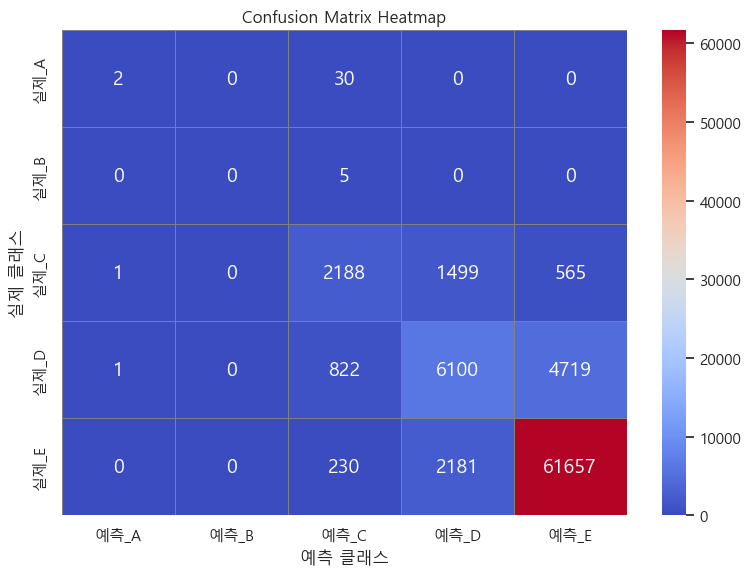

In [8]:
# 혼동행렬을 데이터프레임으로 생성
cm_df = pd.DataFrame(
    cm,
    index=[f"실제_{c}" for c in enc.classes_],
    columns=[f"예측_{c}" for c in enc.classes_]
)

# 그래프 크기 설정
plt.figure(figsize=(8, 6))

# 혼동행렬 히트맵 그리기
sns.heatmap(
    cm_df,
    annot=True,       # 셀별 값 표시
    fmt="d",          # 정수 포맷
    cmap="coolwarm",     # 컬러맵 지정
    cbar=True,        # 컬러바 표시
    linewidths=0.5,   # 셀 사이 간격
    linecolor="gray"  # 셀 경계 색
)

# 제목 및 축 레이블 설정
plt.title("Confusion Matrix Heatmap")
plt.ylabel("실제 클래스")
plt.xlabel("예측 클래스")

# 그래프 출력
plt.tight_layout()
plt.show()